In [2]:
import pandas as pd
data = pd.read_csv("imdb.csv", quotechar="'", escapechar="\\")
data[:10]

,Text,Class
0,One of the first of the best musicals Anchors ...,P
1,Visually disjointed and full of itself the dir...,N
2,These type of movies about young teenagers str...,P
3,I would rather of had my eyes gouged out with ...,N
4,The title says it all. Tail Gunner Joe was a t...,N
5,There is no greater disservice to do to histor...,P
6,National Lampoon Goes to the Movies (1981) is ...,N
7,I rented this on DVD yesterday and did not rea...,N
8,Midnight Cowboy is one of those films thats be...,P
9,Its not a big film. The acting is not amazing ...,P


In [3]:
import numpy as np
data["Class"] = np.where(data['Class'].str.contains("P"), 1, 0)

In [4]:
data[:10]

,Text,Class
0,One of the first of the best musicals Anchors ...,1
1,Visually disjointed and full of itself the dir...,0
2,These type of movies about young teenagers str...,1
3,I would rather of had my eyes gouged out with ...,0
4,The title says it all. Tail Gunner Joe was a t...,0
5,There is no greater disservice to do to histor...,1
6,National Lampoon Goes to the Movies (1981) is ...,0
7,I rented this on DVD yesterday and did not rea...,0
8,Midnight Cowboy is one of those films thats be...,1
9,Its not a big film. The acting is not amazing ...,1


In [5]:
train_data = data.sample(frac=0.75)
train_data[:10]

,Text,Class
1911,Not sure if Im referring to those who labeled ...,0
7887,Why did I waste 1.5 hours of my life watching ...,0
603,I rented this movie from blockbuster on a whim...,1
7297,This hard-hitting often violent western in the...,1
7289,The fact that someone actually spent money on ...,0
5261,Margret Laurence probably didnt intend on havi...,0
5496,Warning: Does contain spoilers. Open Your Eyes...,1
4093,Just a note to add to the above comment. Fear ...,1
494,E! TV is a great channel and Talk Soup is so f...,1
5586,Nay Sayers of this film are likely bitter from...,1


In [6]:
test_data = data.drop(train_data.index)
test_data[:10]

,Text,Class
5,There is no greater disservice to do to histor...,1
9,Its not a big film. The acting is not amazing ...,1
13,Imagine the scenario - you are at the movie th...,0
17,Near the beginning after its been established ...,0
19,OK this movie was cool. I dont think it was th...,1
22,this move was friggin hilarious!!! funniest Iv...,1
24,CREEP is a straight up serious horror film set...,1
27,A surprisingly good movie! It has quite a few ...,1
28,Another too bad the lowest they can go here is...,0
32,This is definitely the worst bigfoot movie Ive...,0


In [7]:
X_train = train_data["Text"]
X_train[:10]

1911    Not sure if Im referring to those who labeled ...
7887    Why did I waste 1.5 hours of my life watching ...
603     I rented this movie from blockbuster on a whim...
7297    This hard-hitting often violent western in the...
7289    The fact that someone actually spent money on ...
5261    Margret Laurence probably didnt intend on havi...
5496    Warning: Does contain spoilers. Open Your Eyes...
4093    Just a note to add to the above comment. Fear ...
494     E! TV is a great channel and Talk Soup is so f...
5586    Nay Sayers of this film are likely bitter from...
Name: Text, dtype: object

In [8]:
Y_train = train_data["Class"]
Y_train[:10]

1911    0
7887    0
603     1
7297    1
7289    0
5261    0
5496    1
4093    1
494     1
5586    1
Name: Class, dtype: int64

In [9]:
X_test = test_data["Text"]
X_test[:10]

5     There is no greater disservice to do to histor...
9     Its not a big film. The acting is not amazing ...
13    Imagine the scenario - you are at the movie th...
17    Near the beginning after its been established ...
19    OK this movie was cool. I dont think it was th...
22    this move was friggin hilarious!!! funniest Iv...
24    CREEP is a straight up serious horror film set...
27    A surprisingly good movie! It has quite a few ...
28    Another too bad the lowest they can go here is...
32    This is definitely the worst bigfoot movie Ive...
Name: Text, dtype: object

In [10]:
Y_test = test_data["Class"]
Y_test[:10]

5     1
9     1
13    0
17    0
19    1
22    1
24    1
27    1
28    0
32    0
Name: Class, dtype: int64

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#create binary CountVectorizer 
count_vectorizer = CountVectorizer(binary=True, stop_words = 'english') #keeps track of each word in doc
count_vectorizer.fit(X_train) #perform only on training data
list(count_vectorizer.vocabulary_.keys())[0:10]

['sure',
 'im',
 'referring',
 'labeled',
 'video',
 'nasty',
 'director',
 'devil',
 'hunter',
 'bizarre']

In [12]:
#transform train & test sets of count vectorizer
X_train_count = count_vectorizer.transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [13]:
#create binary TfidVectorizer
tfidf_vectorizer = TfidfVectorizer(binary = True, stop_words = 'english')
tfidf_vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [14]:
#transform train & test sets of Tfid vectorizer
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [15]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

fprs = []
tprs = []
auc_labels = []

#create log reg and bernoulli models for count vect
lr_count = LogisticRegression()
lr_count.fit(X_train_count, Y_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, lr_count.predict_proba(X_test_count)[:,1])
fprs.append(fpr)
tprs.append(tpr)
auc = metrics.roc_auc_score(Y_test, lr_count.predict_proba(X_test_count)[:,1])
auc_labels.append("Count (Log Reg), auc: "+str(round(auc,4)))

bern_count = BernoulliNB()
bern_count.fit(X_train_count, Y_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, bern_count.predict_proba(X_test_count)[:,1])
fprs.append(fpr)
tprs.append(tpr)
auc = metrics.roc_auc_score(Y_test, bern_count.predict_proba(X_test_count)[:,1])
auc_labels.append("Count (Bernoulli), auc: "+str(round(auc,4)))


#create log reg and bernoulli models for tfidf
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf, Y_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, lr_tfidf.predict_proba(X_test_tfidf)[:,1])
fprs.append(fpr)
tprs.append(tpr)
auc = metrics.roc_auc_score(Y_test, lr_tfidf.predict_proba(X_test_tfidf)[:,1])
auc_labels.append("TFIDF (Log Reg), auc: "+str(round(auc,4)))

bern_tfidf = BernoulliNB()
bern_tfidf.fit(X_train_tfidf, Y_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, bern_tfidf.predict_proba(X_test_tfidf)[:,1])
fprs.append(fpr)
tprs.append(tpr)
auc = metrics.roc_auc_score(Y_test, bern_tfidf.predict_proba(X_test_tfidf)[:,1])
auc_labels.append("TFIDF (Bernoulli), auc: "+str(round(auc,4)))

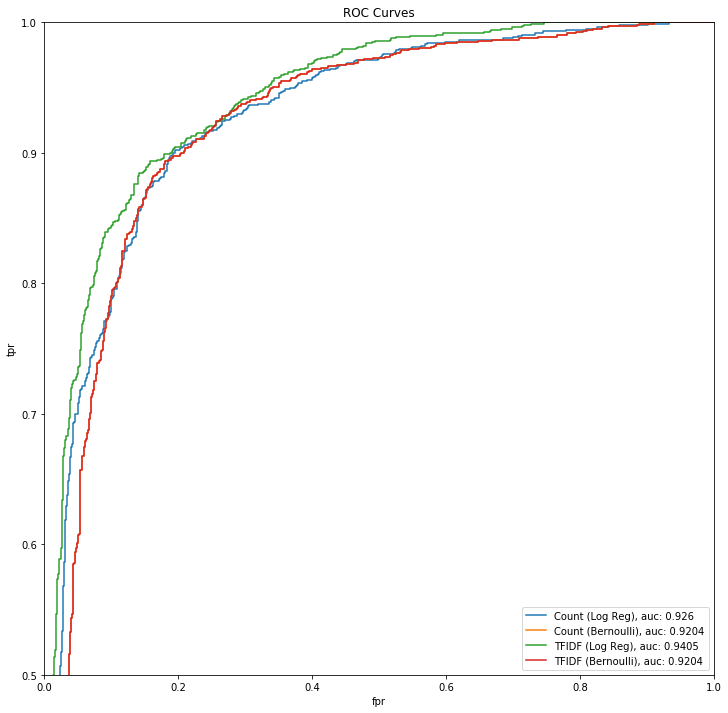

In [17]:
for fpr, tpr, auc_label in zip(fprs, tprs, auc_labels):
    plt.plot(fpr, tpr, label=auc_label)

plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curves")
plt.legend(loc = 4)
plt.xlim(0,1)
plt.ylim(0.5,1)
plt.show()

In [28]:
#class predictions
df = pd.DataFrame([X_test,Y_test]).transpose()
df["Predicted"] = lr_tfidf.predict(X_test_tfidf)
df.head()

,Text,Class,Predicted
5,There is no greater disservice to do to history than to misrepresent it. This takes the easiest and most shallow route simply portraying him as a monster. Only showing his negative sides and exaggerating them. Those who are ignorant of the past doom us to repeat it. He was a human being. That may prove tough to some people to accept but an important part of life is facing that which we dont want to. Rather than demonizing the man we ought to try to understand him. Otherwise we stand little chance of preventing anyone similar in the future or possibly even the present from succeeding at anything of remotely comparable scope as far as damage and misery goes. Hate him and what he did dont make him into something mythical intentionally or otherwise. Frankly far too much of this mini-series could play dumb dumb *duuum*! after or during scenes. The whole thing nods nudges and winks at the audience with a clear message of was this guy evil or what incorporating every single bad trait(as well as making up several that go directly against who and what he was) letting them appear more or less out of nowhere and having them be constant throughout his life not something he came to believe or claimed to. This should never be used to educate. Use Der Untergang(Downfall in English) and maybe point out the few inaccuracies of that instead. This this is disrespectful to the actual events that took place and to any and all survivors not to mention those who died. The cinematic quality? Top-notch. Its well-done through and through excellent production values a solid arc to the well-told plot what characterization does occur is strong and credible dialog and script are great all acting performances are masterful(Carlyle looks and behaves the role... as it was written... perfectly) the music is well-composed cinematography and editing are flawless and creative and this is definitely dramatic entertaining and riveting. They get dates and many occurrences and do them justice. If I had been offered to work on this and did not feel I could be objective enough to have Hitler appear as a fully fleshed-out person I would have declined citing that as the reason. I dont blame anyone for loathing him. How can you forgive what he did and are we sure that we should? That is not what I am suggesting. Finally let me point out that as I write this we are in a world-wide economic crisis that has lasted for about two years and that is not terribly dissimilar to the stock market crash of 1929. The two reasons it hasnt led to a depression of the new millennium are as follows: governments are giving money to the banks to keep the market going and the majority of the countries is now friendly towards one another. Apart from that the lesson hadnt been learned. Hopefully it has now. Back to this... my suggestion? Read a book non-fiction dealing with the subject. There are plenty of informative smart ones. The DVD holds a trailer. I recommend this only to those who know better and vehemently urge anyone who has watched it to seek out the truth. 8/10,1,1
9,Its not a big film. The acting is not amazing (some sub charterers are even played badly) The film is not beautiful in any sense. Nothing really inventive or new. If you like big films this one is not for you. yet it has a big - REALLY BIG plus on the story. Larrys story works because we know this story from our own lives. The girl we didnt ask to a date the test weve failed the friend we let down are all in our history. This movie works because it touch it Its a great story because its a small one. Its the life we all have with regrets we all have and yet the message hits: every life we could have lived would have had their downside. The first time I watched it I was 15. It was shown in a party at my school. 16 years later I keep reflecting on it every once in a while and every time I see it it puts a smile on my face. Watch it. It will do you good. Youll be happier with what you have.,1,1
13,Im

In [27]:
#instances where predictions do not match the actual class
incorrect_pred = df[(df["Class"]) != (df["Predicted"])]
incorrect_pred.head()

,Text,Class,Predicted
24,CREEP is a straight up serious horror film set in real time that wants nothing more than to just show people get attacked in a empty subway platform by a mutant for 85 minutes. And it does just that. Nothing more nothing less. Director Christopher Smith draws out the drama a far as he plausibly can by introducing a series of characters that would actually have a reason to be in the subway after it is locked. He also leaves the origins of the titular Creep deliberately vague (unlawful experiments happening in the 60s underground are hinted at) and that little bit of mystery works for the most part. Sadly he undermines himself toward the end by actually holding back from a twist ending where more genetic malformations would appear (they are hinted at as well). Yes you heard me right - I wanted a clichéd twist ending! Franka (RUN LOLA RUN) Potente is good as the terrorized female lead and the rest of the cast is fine.,1,0
27,A surprisingly good movie! It has quite a few good jokes thru out the whole movie. The only negative thing is that some scenes go to the extremes to show just how stupid the two main characters are. We get it stupid blondes get on with it! The plot just barely dodges being called corny. And boobies are always a plus altho the movie for some strange reason doesnt play with that card very much even tho the plot line introduces two black haired women who act as the evil counter part of our two blondes. So all in all a good movie to watch. I almost gave it an 8/10 but lets not get crazy.,1,0
99,This is strictly a review of the pilot episode as it appears on DVD. Television moved out of my life in 1981 so I never followed the series or any part of it - which means that Im immune to the nostalgic charm that Moonlighting appears to have for most reviewers. (Possible spoiler warning) The pilot of Moonlighting is your basic caveman meets fluffball yarn where a charming red-blooded he-man manipulates a misguided woman into realizing what she really wants and needs. The premises that the scripts wit is based on must have already felt stale around 1950. It also contains some frankly bad writing as in the scene where Maddie demolishes the furnishings instead of shooting the villain strictly in order to prove herself the inept female in need of masculine assistance. I often feel that Susan Faludi overreacts in seeing male chauvinist conspiracy in simple entertainment but in this particular case Im all with her - Moonlighting has BACKLASH stamped all over it. In one sense however this DVD is a must for all serious Bruce Willis fans: in addition to the pilot episode it contains the screen test that landed Willis the job. Both features show to what amazing extent Willis acting ability developed between 1985 and 1988/89 (Die Hard 1 In Country). Impressive! Rating (and I _am_ a Bruce Willis fan): 2 out of 10,0,1
116,this movie is awesome. sort of. it dosent really say much or do much but it is an awesome movie to watch because of how stupid it is. the high school is taken over by evil ms.togar that hates the one thing that all the students love rock& roll. riff randle get everyone tickets for the ramones show and this movie peaks with a take over of the school led my riff randle & the ramones. this movie has everything a bad script questionable directing bad actors(ie clint howard & p.j. soles) an awesome soundtrackextreme campyness these elements & much more come together to make this what it isa classic. note - during the live ramones set notice that darby crash of the germs is in the front of the crowd. neat-o.,1,0
118,As shallow as it may sound I actually delayed my viewing of The Barbarians several times just because the VHS cover (as well as the picture image displayed here on the website) looks so incredibly gay! By now I wish I had watched it earlier because the movie isnt so much gay . just trashy cheesy campy and enormously fun! Its almost unbelievable that Ruggero Deodato director of Cannibal

In [31]:
# % of incorrect predictions
len(incorrect_pred)/len(df)

0.1303529411764706